# Numpy速習

<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
</script>
<script type="text/x-mathjax-config">
 MathJax.Hub.Config({
 tex2jax: {
 inlineMath: [['$', '$'] ],
 displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
 }
 });
</script>

♦単回帰分析の傾きを求める式
$$
a = \frac{\displaystyle　\sum_{n=1}^N x_ny_n}{\displaystyle　\sum_{n=1}^N x_n^2}
$$

・分母：xの2乗の和
$$\sum_{n=1}^N x_ny_n$$

・分子：xとyの掛け算の総和
$$\sum_{n=1}^N x_n^2$$

♦使用するサンプルのデータ
| x   | y   | 
| --- | --- | 
| 1   | 2   | 
| 2   | 3.9 | 
| 3   | 6.1 | 

In [1]:
import numpy as np

In [18]:
# ベクトルを定義
x = np.array([[1,2,3]])

[[1]
 [2]
 [3]]


In [8]:
x.mean()

2.0

In [10]:
y = np.array([[2.,3.9,6.1]])

In [13]:
y.mean()

4.0

In [21]:
# データの中心窩(centering)
xc = x-x.mean()
xc

array([[-1.,  0.,  1.]])

In [23]:
# データの中心窩(centering)
yc = y-y.mean()
yc

array([[-2. , -0.1,  2.1]])

## aの計算

$$
a = \frac{\displaystyle　\sum_{n=1}^N x_ny_n}{\displaystyle　\sum_{n=1}^N x_n^2}
$$

In [27]:
# 要素積
x * x

array([[1, 4, 9]])

In [29]:
x

array([[1, 2, 3]])

In [32]:
xx = xc * xc
xx

array([[1., 0., 1.]])

In [34]:
xy = xc * yc
xy

array([[ 2. , -0. ,  2.1]])

In [36]:
# 合計: .sum()
xx.sum()

2.0

In [38]:
xy.sum()

4.1

In [39]:
# aを算出
a = xy.sum() / xx.sum()
a

2.05

# Pandas速習

In [41]:
import pandas as pd

In [43]:
df = pd.read_csv("./参考/sample.csv")

In [45]:
df

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
...,...,...
95,47.250,250000.0
96,43.722,166500.0
97,42.642,151500.0
98,43.644,173000.0


In [47]:
type(df)

pandas.core.frame.DataFrame

## PandasでDataframeの操作

In [50]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [52]:
df.tail(3)

,x,y
97,42.642,151500.0
98,43.644,173000.0
99,41.850,174500.0


In [57]:
df[2:10]

,x,y
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
5,35.106,97500.0
6,35.016,97500.0
7,36.762,102000.0
8,38.844,99000.0
9,37.374,97000.0


In [63]:
# .iloc[行,列]
df.iloc[0,0]

40.362

In [65]:
df.iloc[:10,0]

0    40.362
1    40.686
2    38.430
3    36.822
4    37.002
5    35.106
6    35.016
7    36.762
8    38.844
9    37.374
Name: x, dtype: float64

In [67]:
df["x"]

0     40.362
1     40.686
2     38.430
3     36.822
4     37.002
       ...  
95    47.250
96    43.722
97    42.642
98    43.644
99    41.850
Name: x, Length: 100, dtype: float64

In [69]:
x = df["x"]
y = df["y"]

In [72]:
print(type(df))
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Matplotlib速習

In [74]:
import matplotlib.pyplot as plt

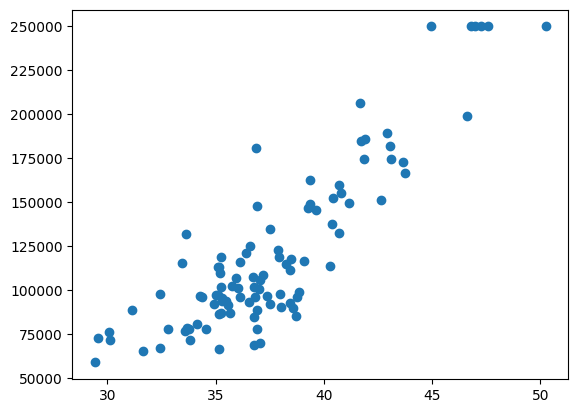

In [78]:
plt.scatter(x,y);

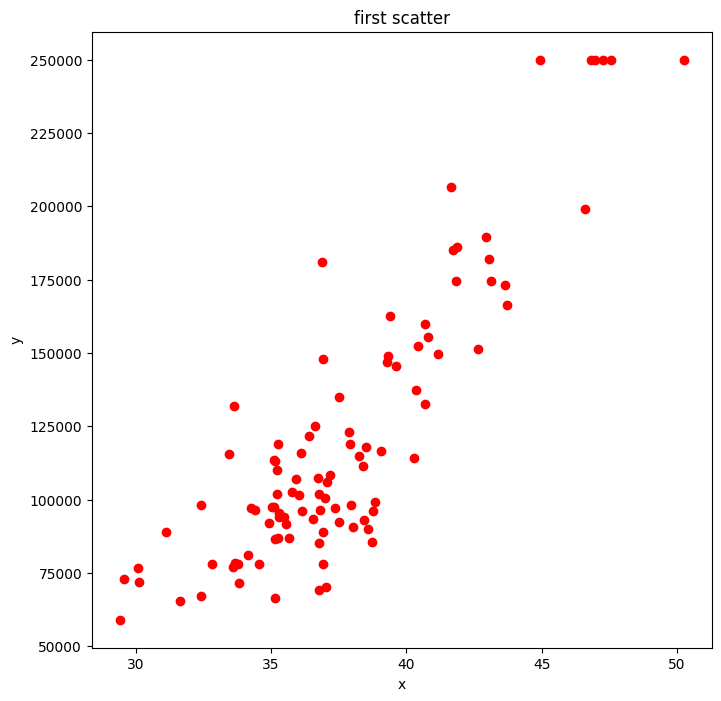

In [86]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(x,y,c="red")
ax.set_title("first scatter")
ax.set_xlabel("x")
ax.set_ylabel("y");

# Numpy実装

## 単回帰分析

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("./参考/sample.csv")

In [92]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


## データの中心化

In [96]:
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [98]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [101]:
df_c = df - df.mean()
df_c

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0
3,-0.80022,-24565.0
4,-0.62022,-20565.0
...,...,...
95,9.62778,128935.0
96,6.09978,45435.0
97,5.01978,30435.0
98,6.02178,51935.0


In [103]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,2.096101e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [105]:
x = df_c["x"]
y = df_c["y"]

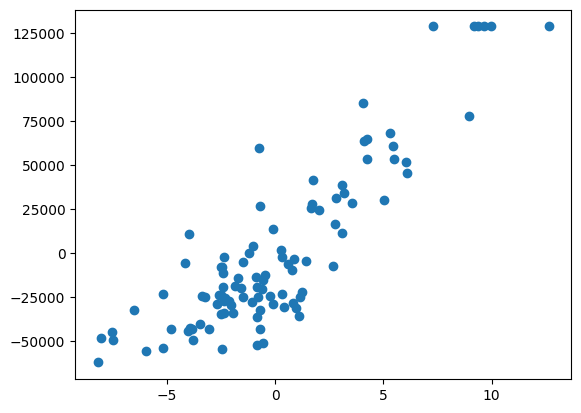

In [108]:
plt.scatter(x,y);

## パラメータaの計算

$$
a = \frac{\displaystyle　\sum_{n=1}^N x_ny_n}{\displaystyle　\sum_{n=1}^N x_n^2}
$$

In [111]:
xx = x * x
xy = x * y
a = xy.sum() / xx.sum()
a

10069.022519284063

## 結果のプロット

$$ \hat{y} = ax $$

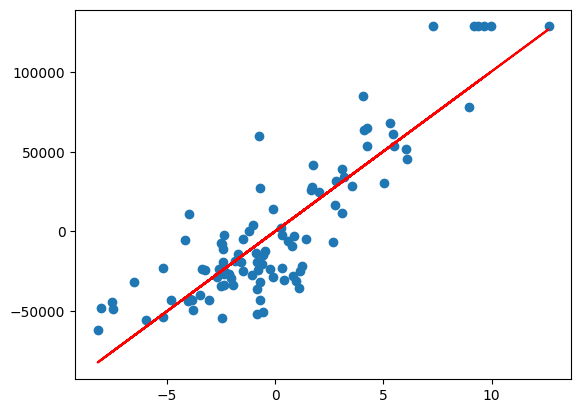

In [115]:
plt.scatter(x,y)
plt.plot(x,a*x,c="red")

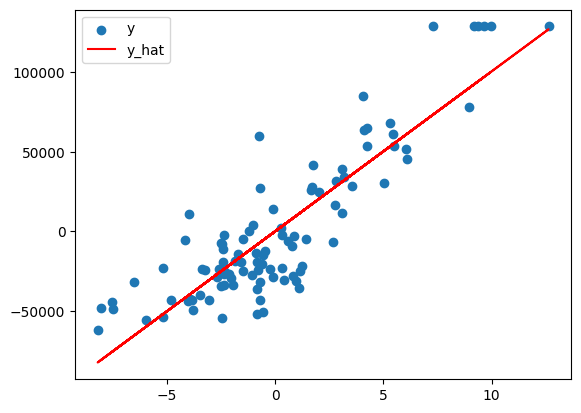

In [116]:
plt.scatter(x,y,label="y")
plt.plot(x,a*x,c="red",label="y_hat")
plt.legend();

## 予測

$$
y - \hat{y} = a(x - \hat{x})\\
\rightarrow y = a(a - \hat{x}) + \hat{y}
$$

In [118]:
# 40平米の家賃
x_new = 40

In [120]:
mean = df.mean()
mean["x"]

37.62222

In [123]:
xc_new = x_new - mean["x"]
xc_new

2.3777800000000013

In [127]:
yc = a * xc_new
yc

23941.920365903272

In [128]:
# 中心化前の状態に戻す
y_hat = yc + mean["y"]
y_hat

145006.92036590326

## 予測値を算出する関数を作成

In [129]:
def predict(x):
    #定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.00000

    #中心化
    xc = x - xm

    #予測
    y_hat = a * xc + ym

    return y_hat

In [131]:
predict(40)

145006.92036590326

In [133]:
predict(30)

44316.695173062646

In [135]:
#外挿の範囲
predict(20)

-56373.53001977797